# Aplicação de detecção de anomalia utilizando Regressão Logística



In [ ]:
#bibliotecas utilizadas
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#Importe do dataset
dataset = pd.read_excel("pzt2.xlsx", header=None)

display(dataset)

In [ ]:
#Tratamento do dataset - Transpor dados
data = dataset.T

display(data)

In [ ]:
#Tratamento do dataset - Remover linha da frequencia "0"
new_data = data.drop(0, axis=0)

display(new_data)

In [11]:
#Tratamento do dataset - Verificar tipo de dados
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970 entries, 1 to 2970
Columns: 4000 entries, 0 to 3999
dtypes: float64(4000)
memory usage: 90.7 MB


In [24]:
#Definindo dados de treinamento
X_train = new_data

y_train = []
for i in range(2970):
    y = 0 if i < 660 else 1
    y_train.append(y)

In [25]:
#Aplicar a regressão logística
classificador = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [26]:
classificador.predict(X_train)

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
classificador.predict_proba(X_train)

array([[9.99999912e-01, 8.81922483e-08],
       [9.99999979e-01, 2.06220027e-08],
       [9.99999983e-01, 1.65568697e-08],
       ...,
       [6.62929238e-08, 9.99999934e-01],
       [7.47519975e-08, 9.99999925e-01],
       [3.92768151e-08, 9.99999961e-01]])

In [28]:
#Resultado
classificador.score(X_train, y_train)

1.0

<AxesSubplot:>

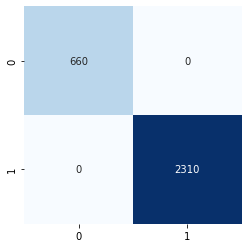

In [29]:
#Matriz de confusão
mc = confusion_matrix(y_train, classificador.predict(X_train))
sns.heatmap(mc, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)